In [1]:
#import datetime
#from datetime import datetime

import numpy as np
import os
import pandas as pd 
import sys
 
import xarray as xr
import cfgrib

#### dataset check

In [ ]:
%%time
dir_data = '/glade/work/nomani/LCB_Moonsoon_Forecast/ECMWF_1981_1993_2022/'
flnm = dir_data + 'ECMWF5_SH850_Aug_Day01.grib'
#ds = xr.load_dataset(dir_data + flnm, engine="cfgrib")
ds = xr.load_dataset(flnm, engine="cfgrib")
ds                   

Can't create file '/glade/work/nomani/LCB_Moonsoon_Forecast/ECMWF_1981_1993_2022/ECMWF5_SH850_Aug_Day01.grib.923a8.idx'
Traceback (most recent call last):
  File "/glade/u/home/mingge/miniforge3/envs/casper_2023/lib/python3.10/site-packages/cfgrib/messages.py", line 534, in from_indexpath_or_filestream
    with compat_create_exclusive(indexpath) as new_index_file:
  File "/glade/u/home/mingge/miniforge3/envs/casper_2023/lib/python3.10/contextlib.py", line 135, in __enter__
    return next(self.gen)
  File "/glade/u/home/mingge/miniforge3/envs/casper_2023/lib/python3.10/site-packages/cfgrib/messages.py", line 500, in compat_create_exclusive
    fd = os.open(path, os.O_WRONLY | os.O_CREAT | os.O_EXCL)
PermissionError: [Errno 13] Permission denied: '/glade/work/nomani/LCB_Moonsoon_Forecast/ECMWF_1981_1993_2022/ECMWF5_SH850_Aug_Day01.grib.923a8.idx'
Can't read index file '/glade/work/nomani/LCB_Moonsoon_Forecast/ECMWF_1981_1993_2022/ECMWF5_SH850_Aug_Day01.grib.923a8.idx'
Traceback (most re

#### write to NetCDF dataset
 - Nina's first downloaded version

In [ ]:
# 25 members before 2017
dir_o = '/glade/campaign/mmm/c3we/ECMWF/'

dir_data = '/glade/work/nomani/LCB_Moonsoon_Forecast/ECMWF_1981_1993_2022/'

month_s = ['June', 'July', 'Aug', 'Sept', 'Oct']
month_1d = ['06',   '07',  '08',  '09',   '10']
n_month = len(month_1d)

is_first = 1
for nm in range(n_month):
    flnm = dir_data + 'ECMWF5_SH850_' + month_s[nm] + '_Day01.grib'
    print(flnm)
    ds = xr.load_dataset(flnm, engine="cfgrib")
    q_5d = ds.q   #'q'number: 51time: 15step: 430latitude: 41longitude: 76

    if is_first == 1:
        # extract year from  dtype='timedelta64[ns]')
        year_1d = pd.to_datetime(ds.time).year
        mem_1d = ds.number.values + 1
        is_first = 0

    ct = 0
    for year in year_1d:
        if year < 1993:
            mem_s = np.arange(1,26)
        elif year >= 2017:
            mem_s = mem_1d
        
        for mem in mem_s:
            if year !=1993 and year !=2021: 
                yyyymm = str(year) + month_1d[nm]
                path_t = dir_o + yyyymm
                isExist = os.path.exists(path_t) 
                if not isExist:
                    print(path_t + ' not exist')
                    os.system('mkdir ' + path_t)
                
                path_t = path_t + '/qall_GDS0_ISBL/'
                isExist = os.path.exists(path_t) 
                if not isExist:
                    print(path_t + ' not exist')
                    os.system('mkdir ' + path_t)
                
                flnm_o = dir_o + yyyymm + '/qall_GDS0_ISBL/q850_day_ECMWF_mem' + str(mem).zfill(2) + '_'+ yyyymm + '.nc'
                #flnm_o = 'q850_day_ECMWF_mem' + str(mem).zfill(2) + '_'+ yyyymm + '_test.nc'
                if os.path.isfile(flnm_o):
                    print(flnm_o, 'exist')
                
                else:
                    print('write out ' + flnm_o)
                    Q_GDS0_ISBL = q_5d[mem-1, ct]
                    Q_GDS0_ISBL = Q_GDS0_ISBL.rename('Q_GDS0_ISBL')
                    Q_GDS0_ISBL = Q_GDS0_ISBL.rename({'step': 'forecast_time1', 
                                              'latitude':'g0_lat_3',
                                             'longitude':'g0_lon_4'})
                    Q_GDS0_ISBL.to_netcdf(path = flnm_o)
                
        ct += 1

Can't create file '/glade/work/nomani/LCB_Moonsoon_Forecast/ECMWF_1981_1993_2022/ECMWF5_SH850_June_Day01.grib.923a8.idx'
Traceback (most recent call last):
  File "/glade/u/home/mingge/miniforge3/envs/casper_2023/lib/python3.10/site-packages/cfgrib/messages.py", line 534, in from_indexpath_or_filestream
    with compat_create_exclusive(indexpath) as new_index_file:
  File "/glade/u/home/mingge/miniforge3/envs/casper_2023/lib/python3.10/contextlib.py", line 135, in __enter__
    return next(self.gen)
  File "/glade/u/home/mingge/miniforge3/envs/casper_2023/lib/python3.10/site-packages/cfgrib/messages.py", line 500, in compat_create_exclusive
    fd = os.open(path, os.O_WRONLY | os.O_CREAT | os.O_EXCL)
PermissionError: [Errno 13] Permission denied: '/glade/work/nomani/LCB_Moonsoon_Forecast/ECMWF_1981_1993_2022/ECMWF5_SH850_June_Day01.grib.923a8.idx'
Can't read index file '/glade/work/nomani/LCB_Moonsoon_Forecast/ECMWF_1981_1993_2022/ECMWF5_SH850_June_Day01.grib.923a8.idx'
Traceback (most

/glade/work/nomani/LCB_Moonsoon_Forecast/ECMWF_1981_1993_2022/ECMWF5_SH850_June_Day01.grib


#### Aug test

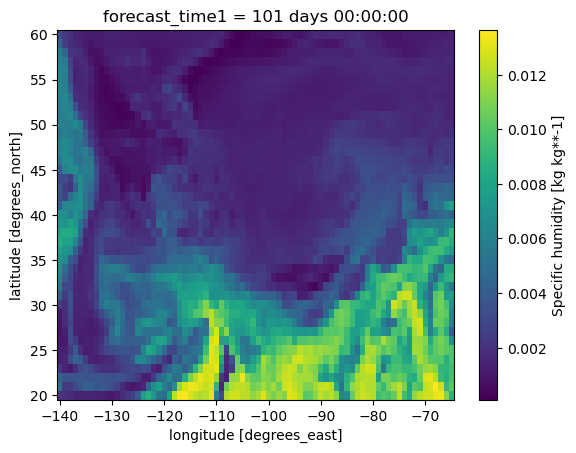

In [48]:
flnm_nc = '/glade/campaign/mmm/c3we/ECMWF/199208/qall_GDS0_ISBL/q850_day_ECMWF_mem24_199208.nc'
ds_nc = xr.load_dataset(flnm_nc)
ds_nc.Q_GDS0_ISBL[201].plot()  

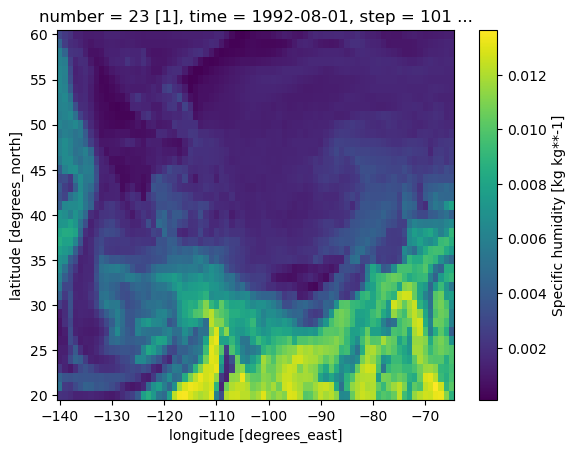

In [49]:
flnm_grb = '/glade/work/nomani/LCB_Moonsoon_Forecast/ECMWF_1981_1993_2022/ECMWF5_SH850_Aug_Day01.grib'
#ds_8 = xr.load_dataset(flnm_grb, engine="cfgrib")
#q_5d = ds_grb.q # xarray.DataArray'q'number: 51time: 15step: 430latitude: 41longitude: 76
ds_8.q[23,11,201,:,:].plot()

#### July test

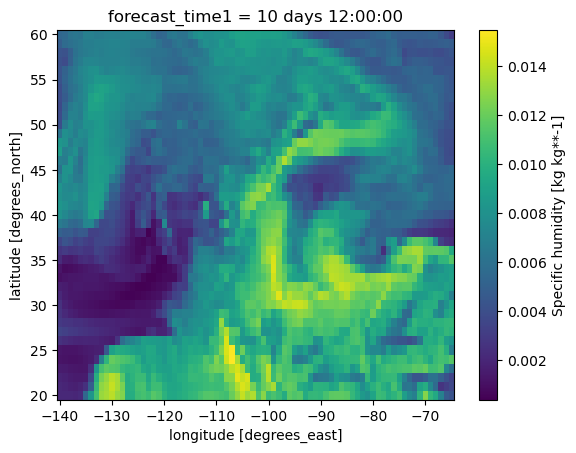

In [36]:
flnm_nc = '/glade/campaign/mmm/c3we/ECMWF/202207/qall_GDS0_ISBL/q850_day_ECMWF_mem50_202207.nc'
ds_nc = xr.load_dataset(flnm_nc)
ds_nc.Q_GDS0_ISBL[20].plot()

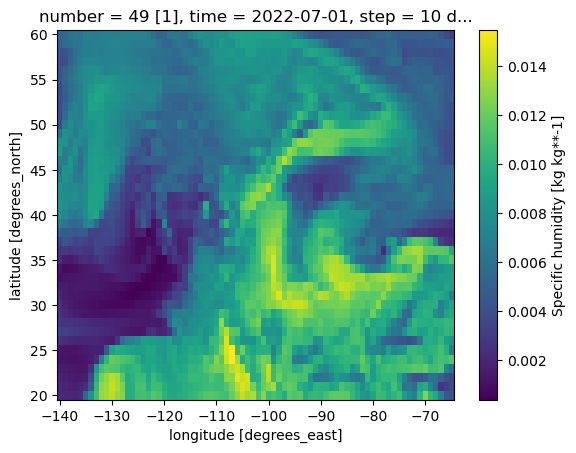

In [37]:
flnm_grb = '/glade/work/nomani/LCB_Moonsoon_Forecast/ECMWF_1981_1993_2022/ECMWF5_SH850_July_Day01.grib'
# ds_7 = xr.load_dataset(flnm_grb, engine="cfgrib")
# ds_7.q  # member:51  year:15  step:430  latitude:41 longitude:76
ds_7.q[-2,-1,20,:,:].plot()

#### Oct test

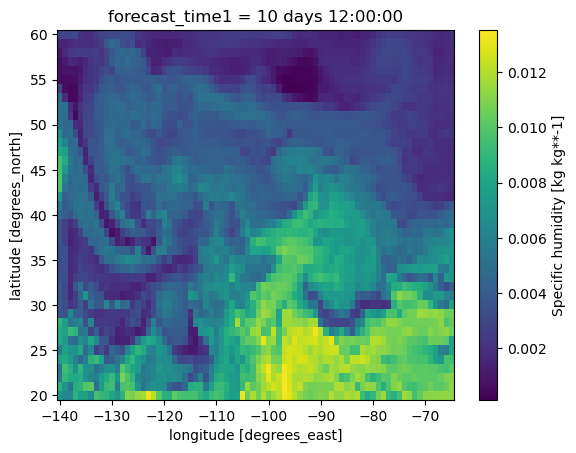

In [50]:
flnm_nc = '/glade/campaign/mmm/c3we/ECMWF/202210/qall_GDS0_ISBL/q850_day_ECMWF_mem50_202210.nc'
ds_nc = xr.load_dataset(flnm_nc)
ds_nc.Q_GDS0_ISBL[20].plot()

Can't create file '/glade/work/nomani/LCB_Moonsoon_Forecast/ECMWF_1981_1993_2022/ECMWF5_SH850_Oct_Day01.grib.923a8.idx'
Traceback (most recent call last):
  File "/glade/u/home/mingge/miniforge3/envs/casper_2023/lib/python3.10/site-packages/cfgrib/messages.py", line 534, in from_indexpath_or_filestream
    with compat_create_exclusive(indexpath) as new_index_file:
  File "/glade/u/home/mingge/miniforge3/envs/casper_2023/lib/python3.10/contextlib.py", line 135, in __enter__
    return next(self.gen)
  File "/glade/u/home/mingge/miniforge3/envs/casper_2023/lib/python3.10/site-packages/cfgrib/messages.py", line 500, in compat_create_exclusive
    fd = os.open(path, os.O_WRONLY | os.O_CREAT | os.O_EXCL)
PermissionError: [Errno 13] Permission denied: '/glade/work/nomani/LCB_Moonsoon_Forecast/ECMWF_1981_1993_2022/ECMWF5_SH850_Oct_Day01.grib.923a8.idx'
Can't read index file '/glade/work/nomani/LCB_Moonsoon_Forecast/ECMWF_1981_1993_2022/ECMWF5_SH850_Oct_Day01.grib.923a8.idx'
Traceback (most re

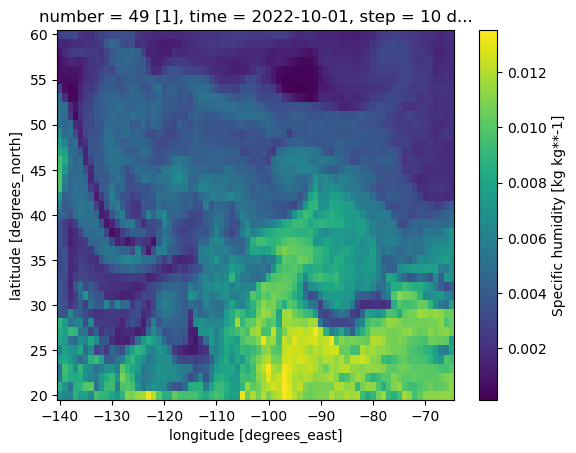

In [51]:
flnm_grb = '/glade/work/nomani/LCB_Moonsoon_Forecast/ECMWF_1981_1993_2022/ECMWF5_SH850_Oct_Day01.grib'
ds_10 = xr.load_dataset(flnm_grb, engine="cfgrib")
# ds_7.q  # member:51  year:15  step:430  latitude:41 longitude:76
ds_10.q[-2,-1,20,:,:].plot()

#### for April and May 1981-1992, 2023

In [11]:
%%time
dir_data = '/glade/work/nomani/LCB_Moonsoon_Forecast/ECMWF_Download_2024/ecmwf_forecast/'
flnm = dir_data + 'ECMWF_2003_2023_April.grib'
ds = xr.load_dataset(flnm, engine="cfgrib")
ds

Can't create file '/glade/work/nomani/LCB_Moonsoon_Forecast/ECMWF_Download_2024/ecmwf_forecast/ECMWF_2003_2023_April.grib.923a8.idx'
Traceback (most recent call last):
  File "/glade/u/home/mingge/miniforge3/envs/casper_2023/lib/python3.10/site-packages/cfgrib/messages.py", line 534, in from_indexpath_or_filestream
    with compat_create_exclusive(indexpath) as new_index_file:
  File "/glade/u/home/mingge/miniforge3/envs/casper_2023/lib/python3.10/contextlib.py", line 135, in __enter__
    return next(self.gen)
  File "/glade/u/home/mingge/miniforge3/envs/casper_2023/lib/python3.10/site-packages/cfgrib/messages.py", line 500, in compat_create_exclusive
    fd = os.open(path, os.O_WRONLY | os.O_CREAT | os.O_EXCL)
PermissionError: [Errno 13] Permission denied: '/glade/work/nomani/LCB_Moonsoon_Forecast/ECMWF_Download_2024/ecmwf_forecast/ECMWF_2003_2023_April.grib.923a8.idx'
Can't read index file '/glade/work/nomani/LCB_Moonsoon_Forecast/ECMWF_Download_2024/ecmwf_forecast/ECMWF_2003_2023_A

<xarray.Dataset>
Dimensions:        (number: 51, time: 21, step: 430, latitude: 41, longitude: 76)
Coordinates:
  * number         (number) int64 0 1 2 3 4 5 6 7 8 ... 43 44 45 46 47 48 49 50
  * time           (time) datetime64[ns] 2003-04-01 2004-04-01 ... 2023-04-01
  * step           (step) timedelta64[ns] 0 days 12:00:00 ... 215 days 00:00:00
    isobaricInhPa  float64 850.0
  * latitude       (latitude) float64 60.0 59.0 58.0 57.0 ... 22.0 21.0 20.0
  * longitude      (longitude) float64 -140.0 -139.0 -138.0 ... -66.0 -65.0
    valid_time     (time, step) datetime64[ns] 2003-04-01T12:00:00 ... 2023-1...
Data variables:
    q              (number, time, step, latitude, longitude) float32 0.000704...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-02-26T15:54 GRIB to CDM+CF via cfgrib-0.9.1...

In [12]:
print('aa')

aa


In [16]:
# ECMWF version 5.1 forecasts covering 1981 to 2023, alongside ECMWF ERA5 Reanalysis data from 1940 to 2023 is accessible on Derecho at: 
dir_data = '/glade/work/nomani/LCB_Moonsoon_Forecast/ECMWF_Download_2024/ecmwf_forecast/'
dir_o = '/glade/campaign/mmm/c3we/ECMWF/'

# 25 members before 1997
 
#month_s = ['April', 'May']
#month_1d = ['04',   '05']
month_s = ['June', 'July', 'Aug', 'Sept', 'Oct']
month_1d = ['06',   '07',  '08',  '09',   '10']
n_month = len(month_1d)

is_first = 1
for nm in range(n_month):
    flnm = dir_data + 'ECMWF_1981_2002_' + month_s[nm] + '.grib'
    flnm = dir_data + 'ECMWF_2003_2023_' + month_s[nm] + '.grib'
    print(flnm)
    ds = xr.load_dataset(flnm, engine="cfgrib")
    q_5d = ds.q   #'q'number: 51time: 15step: 430latitude: 41longitude: 76

    if is_first == 1:
        # extract year from  dtype='timedelta64[ns]')
        year_1d = pd.to_datetime(ds.time).year
        mem_1d = ds.number.values + 1
        is_first = 0

    ct = 0
    for year in year_1d:
        if year < 2017:
            mem_s = np.arange(1,26)
        elif year >= 2017:
            mem_s = mem_1d
        
        for mem in mem_s:
            if year !=1993 and year !=2021: 
                yyyymm = str(year) + month_1d[nm]
                path_t = dir_o + yyyymm
                isExist = os.path.exists(path_t) 
                if not isExist:
                    print(path_t + ' not exist')
                    os.system('mkdir ' + path_t)
                
                path_t = path_t + '/qall_GDS0_ISBL/'
                isExist = os.path.exists(path_t) 
                if not isExist:
                    print(path_t + ' not exist')
                    os.system('mkdir ' + path_t)
                
                flnm_o = dir_o + yyyymm + '/qall_GDS0_ISBL/q850_day_ECMWF_mem' + str(mem).zfill(2) + '_'+ yyyymm + '.nc'
                #flnm_o = 'q850_day_ECMWF_mem' + str(mem).zfill(2) + '_'+ yyyymm + '_test.nc'
                if os.path.isfile(flnm_o):
                    print(flnm_o, 'exist')
                
                else:
                    print('write out ' + flnm_o)
                    Q_GDS0_ISBL = q_5d[mem-1, ct]
                    Q_GDS0_ISBL = Q_GDS0_ISBL.rename('Q_GDS0_ISBL')
                    Q_GDS0_ISBL = Q_GDS0_ISBL.rename({'step': 'forecast_time1', 
                                              'latitude':'g0_lat_3',
                                             'longitude':'g0_lon_4'})
                    Q_GDS0_ISBL.to_netcdf(path = flnm_o)
                
        ct += 1 

Can't create file '/glade/work/nomani/LCB_Moonsoon_Forecast/ECMWF_Download_2024/ecmwf_forecast/ECMWF_2003_2023_June.grib.923a8.idx'
Traceback (most recent call last):
  File "/glade/u/home/mingge/miniforge3/envs/casper_2023/lib/python3.10/site-packages/cfgrib/messages.py", line 534, in from_indexpath_or_filestream
    with compat_create_exclusive(indexpath) as new_index_file:
  File "/glade/u/home/mingge/miniforge3/envs/casper_2023/lib/python3.10/contextlib.py", line 135, in __enter__
    return next(self.gen)
  File "/glade/u/home/mingge/miniforge3/envs/casper_2023/lib/python3.10/site-packages/cfgrib/messages.py", line 500, in compat_create_exclusive
    fd = os.open(path, os.O_WRONLY | os.O_CREAT | os.O_EXCL)
PermissionError: [Errno 13] Permission denied: '/glade/work/nomani/LCB_Moonsoon_Forecast/ECMWF_Download_2024/ecmwf_forecast/ECMWF_2003_2023_June.grib.923a8.idx'
Can't read index file '/glade/work/nomani/LCB_Moonsoon_Forecast/ECMWF_Download_2024/ecmwf_forecast/ECMWF_2003_2023_Jun

/glade/work/nomani/LCB_Moonsoon_Forecast/ECMWF_Download_2024/ecmwf_forecast/ECMWF_2003_2023_June.grib


Can't create file '/glade/work/nomani/LCB_Moonsoon_Forecast/ECMWF_Download_2024/ecmwf_forecast/ECMWF_2003_2023_July.grib.923a8.idx'
Traceback (most recent call last):
  File "/glade/u/home/mingge/miniforge3/envs/casper_2023/lib/python3.10/site-packages/cfgrib/messages.py", line 534, in from_indexpath_or_filestream
    with compat_create_exclusive(indexpath) as new_index_file:
  File "/glade/u/home/mingge/miniforge3/envs/casper_2023/lib/python3.10/contextlib.py", line 135, in __enter__
    return next(self.gen)
  File "/glade/u/home/mingge/miniforge3/envs/casper_2023/lib/python3.10/site-packages/cfgrib/messages.py", line 500, in compat_create_exclusive
    fd = os.open(path, os.O_WRONLY | os.O_CREAT | os.O_EXCL)
PermissionError: [Errno 13] Permission denied: '/glade/work/nomani/LCB_Moonsoon_Forecast/ECMWF_Download_2024/ecmwf_forecast/ECMWF_2003_2023_July.grib.923a8.idx'
Can't read index file '/glade/work/nomani/LCB_Moonsoon_Forecast/ECMWF_Download_2024/ecmwf_forecast/ECMWF_2003_2023_Jul

/glade/campaign/mmm/c3we/ECMWF/200306/qall_GDS0_ISBL/q850_day_ECMWF_mem01_200306.nc exist
/glade/campaign/mmm/c3we/ECMWF/200306/qall_GDS0_ISBL/q850_day_ECMWF_mem02_200306.nc exist
/glade/campaign/mmm/c3we/ECMWF/200306/qall_GDS0_ISBL/q850_day_ECMWF_mem03_200306.nc exist
/glade/campaign/mmm/c3we/ECMWF/200306/qall_GDS0_ISBL/q850_day_ECMWF_mem04_200306.nc exist
/glade/campaign/mmm/c3we/ECMWF/200306/qall_GDS0_ISBL/q850_day_ECMWF_mem05_200306.nc exist
/glade/campaign/mmm/c3we/ECMWF/200306/qall_GDS0_ISBL/q850_day_ECMWF_mem06_200306.nc exist
/glade/campaign/mmm/c3we/ECMWF/200306/qall_GDS0_ISBL/q850_day_ECMWF_mem07_200306.nc exist
/glade/campaign/mmm/c3we/ECMWF/200306/qall_GDS0_ISBL/q850_day_ECMWF_mem08_200306.nc exist
/glade/campaign/mmm/c3we/ECMWF/200306/qall_GDS0_ISBL/q850_day_ECMWF_mem09_200306.nc exist
/glade/campaign/mmm/c3we/ECMWF/200306/qall_GDS0_ISBL/q850_day_ECMWF_mem10_200306.nc exist
/glade/campaign/mmm/c3we/ECMWF/200306/qall_GDS0_ISBL/q850_day_ECMWF_mem11_200306.nc exist
/glade/cam

Can't create file '/glade/work/nomani/LCB_Moonsoon_Forecast/ECMWF_Download_2024/ecmwf_forecast/ECMWF_2003_2023_Aug.grib.923a8.idx'
Traceback (most recent call last):
  File "/glade/u/home/mingge/miniforge3/envs/casper_2023/lib/python3.10/site-packages/cfgrib/messages.py", line 534, in from_indexpath_or_filestream
    with compat_create_exclusive(indexpath) as new_index_file:
  File "/glade/u/home/mingge/miniforge3/envs/casper_2023/lib/python3.10/contextlib.py", line 135, in __enter__
    return next(self.gen)
  File "/glade/u/home/mingge/miniforge3/envs/casper_2023/lib/python3.10/site-packages/cfgrib/messages.py", line 500, in compat_create_exclusive
    fd = os.open(path, os.O_WRONLY | os.O_CREAT | os.O_EXCL)
PermissionError: [Errno 13] Permission denied: '/glade/work/nomani/LCB_Moonsoon_Forecast/ECMWF_Download_2024/ecmwf_forecast/ECMWF_2003_2023_Aug.grib.923a8.idx'
Can't read index file '/glade/work/nomani/LCB_Moonsoon_Forecast/ECMWF_Download_2024/ecmwf_forecast/ECMWF_2003_2023_Aug.g

/glade/campaign/mmm/c3we/ECMWF/200307/qall_GDS0_ISBL/q850_day_ECMWF_mem01_200307.nc exist
/glade/campaign/mmm/c3we/ECMWF/200307/qall_GDS0_ISBL/q850_day_ECMWF_mem02_200307.nc exist
/glade/campaign/mmm/c3we/ECMWF/200307/qall_GDS0_ISBL/q850_day_ECMWF_mem03_200307.nc exist
/glade/campaign/mmm/c3we/ECMWF/200307/qall_GDS0_ISBL/q850_day_ECMWF_mem04_200307.nc exist
/glade/campaign/mmm/c3we/ECMWF/200307/qall_GDS0_ISBL/q850_day_ECMWF_mem05_200307.nc exist
/glade/campaign/mmm/c3we/ECMWF/200307/qall_GDS0_ISBL/q850_day_ECMWF_mem06_200307.nc exist
/glade/campaign/mmm/c3we/ECMWF/200307/qall_GDS0_ISBL/q850_day_ECMWF_mem07_200307.nc exist
/glade/campaign/mmm/c3we/ECMWF/200307/qall_GDS0_ISBL/q850_day_ECMWF_mem08_200307.nc exist
/glade/campaign/mmm/c3we/ECMWF/200307/qall_GDS0_ISBL/q850_day_ECMWF_mem09_200307.nc exist
/glade/campaign/mmm/c3we/ECMWF/200307/qall_GDS0_ISBL/q850_day_ECMWF_mem10_200307.nc exist
/glade/campaign/mmm/c3we/ECMWF/200307/qall_GDS0_ISBL/q850_day_ECMWF_mem11_200307.nc exist
/glade/cam

Can't create file '/glade/work/nomani/LCB_Moonsoon_Forecast/ECMWF_Download_2024/ecmwf_forecast/ECMWF_2003_2023_Sept.grib.923a8.idx'
Traceback (most recent call last):
  File "/glade/u/home/mingge/miniforge3/envs/casper_2023/lib/python3.10/site-packages/cfgrib/messages.py", line 534, in from_indexpath_or_filestream
    with compat_create_exclusive(indexpath) as new_index_file:
  File "/glade/u/home/mingge/miniforge3/envs/casper_2023/lib/python3.10/contextlib.py", line 135, in __enter__
    return next(self.gen)
  File "/glade/u/home/mingge/miniforge3/envs/casper_2023/lib/python3.10/site-packages/cfgrib/messages.py", line 500, in compat_create_exclusive
    fd = os.open(path, os.O_WRONLY | os.O_CREAT | os.O_EXCL)
PermissionError: [Errno 13] Permission denied: '/glade/work/nomani/LCB_Moonsoon_Forecast/ECMWF_Download_2024/ecmwf_forecast/ECMWF_2003_2023_Sept.grib.923a8.idx'
Can't read index file '/glade/work/nomani/LCB_Moonsoon_Forecast/ECMWF_Download_2024/ecmwf_forecast/ECMWF_2003_2023_Sep

/glade/campaign/mmm/c3we/ECMWF/200308/qall_GDS0_ISBL/q850_day_ECMWF_mem01_200308.nc exist
/glade/campaign/mmm/c3we/ECMWF/200308/qall_GDS0_ISBL/q850_day_ECMWF_mem02_200308.nc exist
/glade/campaign/mmm/c3we/ECMWF/200308/qall_GDS0_ISBL/q850_day_ECMWF_mem03_200308.nc exist
/glade/campaign/mmm/c3we/ECMWF/200308/qall_GDS0_ISBL/q850_day_ECMWF_mem04_200308.nc exist
/glade/campaign/mmm/c3we/ECMWF/200308/qall_GDS0_ISBL/q850_day_ECMWF_mem05_200308.nc exist
/glade/campaign/mmm/c3we/ECMWF/200308/qall_GDS0_ISBL/q850_day_ECMWF_mem06_200308.nc exist
/glade/campaign/mmm/c3we/ECMWF/200308/qall_GDS0_ISBL/q850_day_ECMWF_mem07_200308.nc exist
/glade/campaign/mmm/c3we/ECMWF/200308/qall_GDS0_ISBL/q850_day_ECMWF_mem08_200308.nc exist
/glade/campaign/mmm/c3we/ECMWF/200308/qall_GDS0_ISBL/q850_day_ECMWF_mem09_200308.nc exist
/glade/campaign/mmm/c3we/ECMWF/200308/qall_GDS0_ISBL/q850_day_ECMWF_mem10_200308.nc exist
/glade/campaign/mmm/c3we/ECMWF/200308/qall_GDS0_ISBL/q850_day_ECMWF_mem11_200308.nc exist
/glade/cam

Can't create file '/glade/work/nomani/LCB_Moonsoon_Forecast/ECMWF_Download_2024/ecmwf_forecast/ECMWF_2003_2023_Oct.grib.923a8.idx'
Traceback (most recent call last):
  File "/glade/u/home/mingge/miniforge3/envs/casper_2023/lib/python3.10/site-packages/cfgrib/messages.py", line 534, in from_indexpath_or_filestream
    with compat_create_exclusive(indexpath) as new_index_file:
  File "/glade/u/home/mingge/miniforge3/envs/casper_2023/lib/python3.10/contextlib.py", line 135, in __enter__
    return next(self.gen)
  File "/glade/u/home/mingge/miniforge3/envs/casper_2023/lib/python3.10/site-packages/cfgrib/messages.py", line 500, in compat_create_exclusive
    fd = os.open(path, os.O_WRONLY | os.O_CREAT | os.O_EXCL)
PermissionError: [Errno 13] Permission denied: '/glade/work/nomani/LCB_Moonsoon_Forecast/ECMWF_Download_2024/ecmwf_forecast/ECMWF_2003_2023_Oct.grib.923a8.idx'
Can't read index file '/glade/work/nomani/LCB_Moonsoon_Forecast/ECMWF_Download_2024/ecmwf_forecast/ECMWF_2003_2023_Oct.g

/glade/campaign/mmm/c3we/ECMWF/200309/qall_GDS0_ISBL/q850_day_ECMWF_mem01_200309.nc exist
/glade/campaign/mmm/c3we/ECMWF/200309/qall_GDS0_ISBL/q850_day_ECMWF_mem02_200309.nc exist
/glade/campaign/mmm/c3we/ECMWF/200309/qall_GDS0_ISBL/q850_day_ECMWF_mem03_200309.nc exist
/glade/campaign/mmm/c3we/ECMWF/200309/qall_GDS0_ISBL/q850_day_ECMWF_mem04_200309.nc exist
/glade/campaign/mmm/c3we/ECMWF/200309/qall_GDS0_ISBL/q850_day_ECMWF_mem05_200309.nc exist
/glade/campaign/mmm/c3we/ECMWF/200309/qall_GDS0_ISBL/q850_day_ECMWF_mem06_200309.nc exist
/glade/campaign/mmm/c3we/ECMWF/200309/qall_GDS0_ISBL/q850_day_ECMWF_mem07_200309.nc exist
/glade/campaign/mmm/c3we/ECMWF/200309/qall_GDS0_ISBL/q850_day_ECMWF_mem08_200309.nc exist
/glade/campaign/mmm/c3we/ECMWF/200309/qall_GDS0_ISBL/q850_day_ECMWF_mem09_200309.nc exist
/glade/campaign/mmm/c3we/ECMWF/200309/qall_GDS0_ISBL/q850_day_ECMWF_mem10_200309.nc exist
/glade/campaign/mmm/c3we/ECMWF/200309/qall_GDS0_ISBL/q850_day_ECMWF_mem11_200309.nc exist
/glade/cam

In [17]:
print('aa')

aa
